In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut



/home/silvio/.conda/envs/trackml6/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fonte: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### PCA Principal Component Analysis
* Variância e covariância são uma medida do “espalhamento” de um conjunto de pontos ao redor do centro de massa (média)
* Variância - medida do desvio da média para pontos em uma dimensão, por exemplo alturas
* Covariância como uma medida de quanto cada uma das dimensões variam da média em relação um ao outro.
* A covariância é medida entre 2 dimensões para verificar se existe uma relação entre as 2 dimensões, p. número de horas estudado e notas obtidas.
* A covariância entre uma dimensão e ela mesma é a variação


### Matriz de covariância
* É uma matriz quadrada de tamanho igual a quantidade features
* A diagonal principal mostra a variância


### Interpretando covariância

* Um valor positivo de covariância indica ambos dimensões aumentam ou diminuem juntas. 

* Um valor negativo indica enquanto um aumenta a outras diminuições ou vice-versa 

* Se a covariância for zero: as duas dimensões são independentes um do outro

### Os cálculos de covariância são usados para encontrar relações entre dimensões em conjuntos de dados com muitas  dimensões (geralmente maiores que 3) onde a visualização é difícil

* análise de componentes principais (PCA) é uma técnica usada para simplificar um conjunto de dados
* É uma transformação linear que escolhe uma nova sistema de coordenadas para o conjunto de dados maior variação por qualquer projeção dos dados O conjunto fica no primeiro eixo (então chamado de primeiro componente principal),
a segunda maior variância no segundo eixo, e assim por diante.
* O PCA pode ser usado para reduzir a dimensionalidade, eliminando os componentes principais posteriores.

#### Considere o conjunto de pontos a seguir
* 200 pontos pontos entre -2 e 2

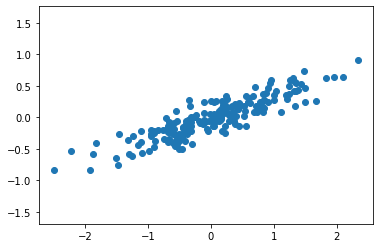

In [10]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

* Há uma relação  linear entre as variáveis x e y. No lugar de tentar prever os valores de y a partir dos valores de x

* O problema de aprendizado não supervisionado tenta aprender sobre a relação entre os valores x e y.

* Na análise de componentes principais (PCA), esse relacionamento é quantificado encontrando uma lista dos eixos principais nos dados e usando esses eixos para descrever o conjunto de dados. 

* Usando o estimador PCA do Scikit-Learn, podemos calcular isso da seguinte maneira:

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.components_)


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


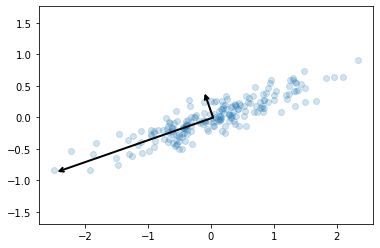

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');



Esses vetores representam os principais eixos dos dados, e o comprimento do vetor é uma indicação de quão "importante" esse eixo é na descrição da distribuição dos dados - mais precisamente, é uma medida da variação dos dados quando projetados. nesse eixo. A projeção de cada ponto de dados nos eixos principais são os "componentes principais" dos dados.


O uso do PCA para redução de dimensionalidade envolve zerar um ou mais dos menores componentes principais, resultando em uma projeção em dimensão mais baixa dos dados que preserva a variação máxima dos dados.

Aqui está um exemplo do uso do PCA como uma transformação de redução de dimensionalidade:

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Os dados transformados foram reduzidos para uma única dimensão. Para entender o efeito dessa redução de dimensionalidade, podemos realizar a transformação inversa desses dados reduzidos e plotá-los junto com os dados originais:

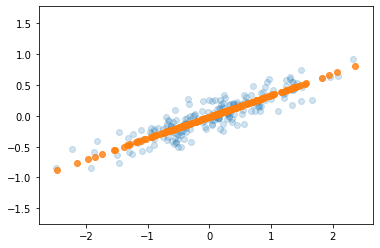

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Os pontos de luz são os dados originais, enquanto os pontos escuros são a versão projetada. Isso deixa claro o que significa uma redução de dimensionalidade da PCA: as informações ao longo do eixo ou eixos principais menos importantes são removidas, deixando apenas o (s) componente (s) dos dados com a maior variação. A fração de variação cortada (proporcional à dispersão de pontos sobre a linha formada nesta figura) é aproximadamente uma medida de quanta "informação" é descartada nessa redução de dimensionalidade.

Este conjunto de dados de dimensão reduzida é, em alguns sentidos, "bom o suficiente" para codificar os relacionamentos mais importantes entre os pontos: apesar de reduzir a dimensão dos dados em 50%, o relacionamento geral entre os pontos de dados é principalmente preservado.

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


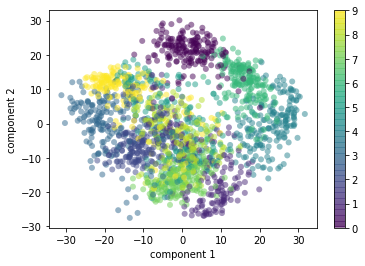

In [22]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

###Escolhendo número de dimensões para PCA

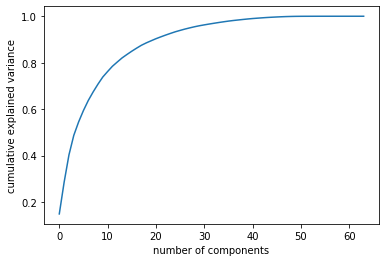

In [23]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

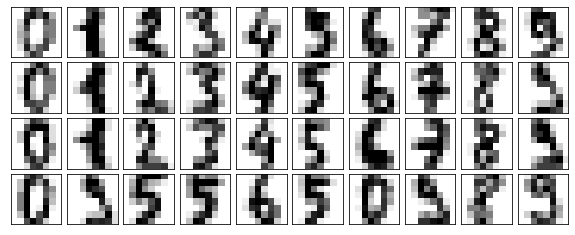

In [24]:


def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)



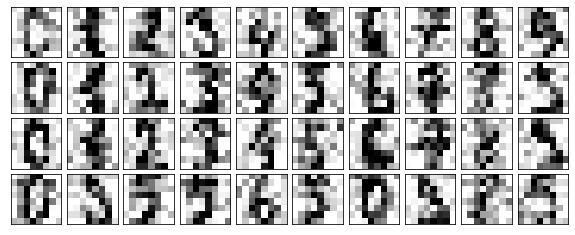

In [25]:


np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)



In [26]:


pca = PCA(0.50).fit(noisy)
pca.n_components_



12

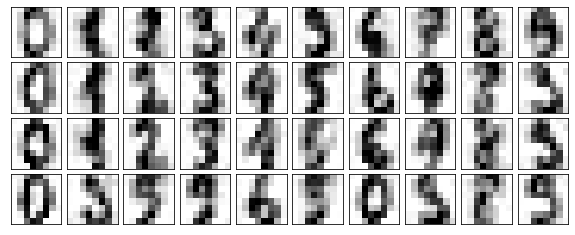

In [27]:


components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)



In [28]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [30]:


#from sklearn.decomposition import RandomizedPCA
pca = PCA(150)
pca.fit(faces.data)



PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

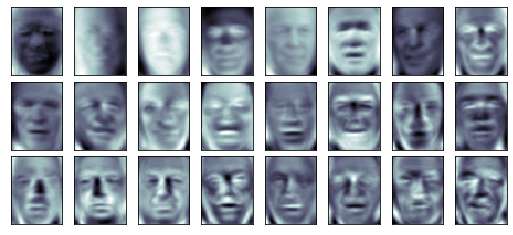

In [31]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


In [ ]:


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



In [ ]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### datasets de teste do SCikit learn
* Utilizando dataset de imagens 

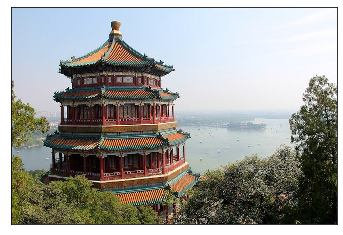

In [5]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

* É uma image de 427x640 pixels, sendo cada pixel três valores correspondente ao RGB

In [7]:
china.shape

(427, 640, 3)

* Os valores de RGB variam de 0 a 255. Dessa forma, os valores nessa matriz são entre 0 a 255, dividindo todo valor por 255, obtemos uma escala entre 0 a 1
* Em seguida os dados foram redimensionados, de 2D para 1D (apenas mudança de posição dos dados, não altera o conteúdo)

In [8]:
data = china / 255.0 # Refazendo para escala entre 0 a 1
data = data.reshape(427 * 640, 3) # transformando o formato de dados 2D para 1D, apenas mudança de representação
data.shape

(273280, 3)

In [17]:
print(data)

[[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]


In [19]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    print(rng)
    i = rng.permutation(data.shape[0])[:N]
    print(i)
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

RandomState(MT19937)
[101521 233130 175683 ...  21042  71188  28548]


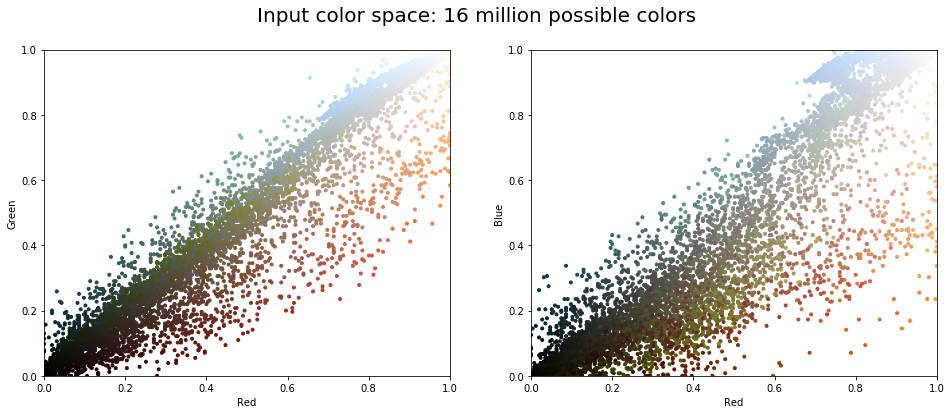

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [3]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

mat = loadmat('shuttle.mat')  # load mat-file
print(mat)
#mdata = mat['measuredData']  # variable in mat file
#mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
# * SciPy reads in structures as structured NumPy arrays of dtype object
# * The size of the array is the size of the structure array, not the number
#   elements in any particular field. The shape defaults to 2-dimensional.
# * For convenience make a dictionary of the data using the names from dtypes
# * Since the structure has only one element, but is 2-D, index it at [0, 0]
#ndata = {n: mdata[n][0, 0] for n in mdtype.names}
# Reconstruct the columns of the data table from just the time series
# Use the number of intervals to test if a field is a column or metadata
#columns = [n for n, v in ndata.iteritems() if v.size == ndata['numIntervals']]
# now make a data frame, setting the time stamps as the index
#df = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=1),
#                  index=[datetime(*ts) for ts in ndata['timestamps']],
#                  columns=columns)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr 26 18:16:23 2016', '__version__': '1.0', '__globals__': [], 'X': array([[ 50,  21,  77, ...,  27,  48,  22],
       [ 53,   0,  82, ...,  29,  30,   2],
       [ 37,   0,  76, ...,  40,  48,   8],
       ...,
       [ 49,   0,  87, ...,  38,  41,   2],
       [ 80,   0,  84, ...,   4, 120, 116],
       [ 37,   0, 103, ...,  66,  85,  20]], dtype=int16), 'y': array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)}
